In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
data=pd.read_csv('heart_disease_dataset.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Percentage of people having heart disease

In [10]:
num=data.groupby('num').size()
num

num
0    164
1    139
dtype: int64

In [12]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [14]:
#Applying converted data into our dataset with new column - Heart_Disease

data['Heart_Disease']=data['num'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence


In [16]:
hd=data.groupby('Heart_Disease')['num'].count()
hd

Heart_Disease
Absence     164
Presence    139
Name: num, dtype: int64

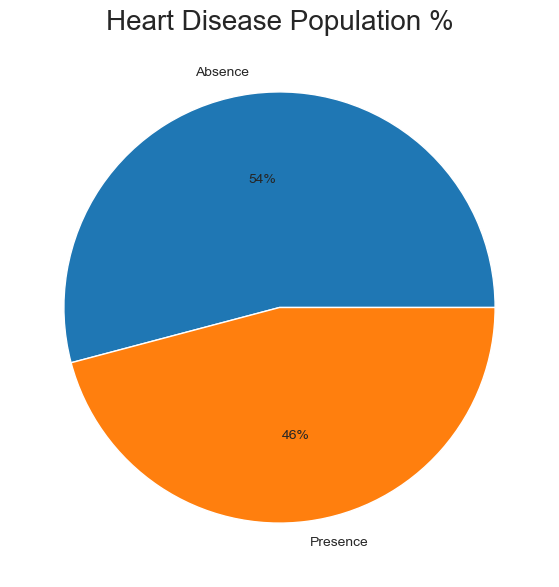

In [18]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(10,7))
plt.pie(hd, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

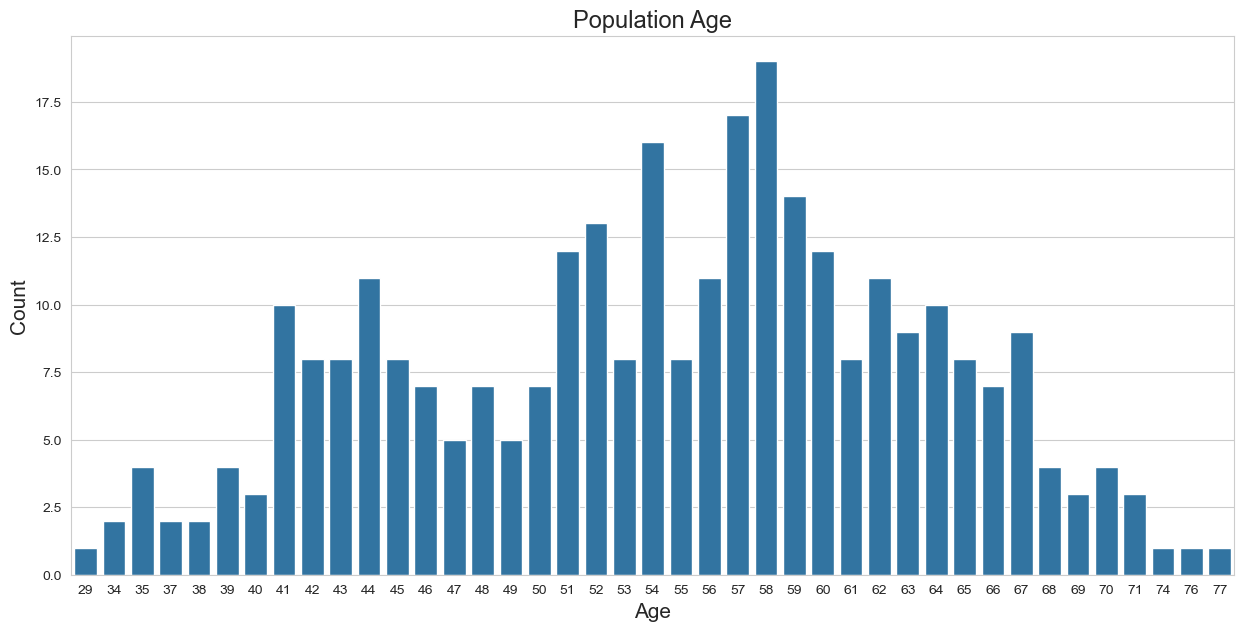

In [19]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [20]:
#Statistical Analysis

Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43894389438944


In [22]:
#Categorical Analysis

Young_Ages=data[(data['age']>=29) & (data['age']<40)]
Middle_Ages=data[(data['age']>=40) & (data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 15
Middle Ages = 128
Elderly Ages = 152


C:\Users\user\AppData\Local\Temp\ipykernel_11112\3903353695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')


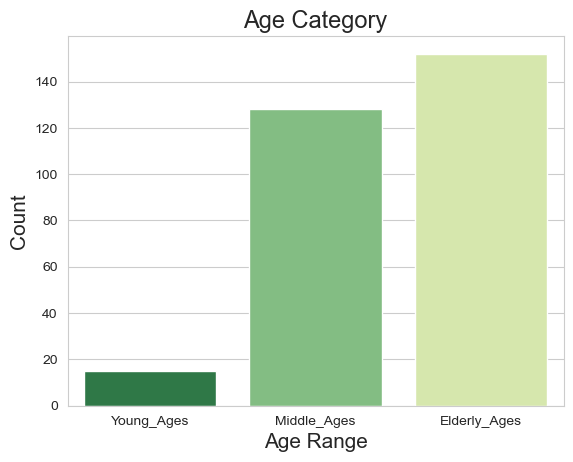

In [23]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [24]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [25]:
#Applying converted data into our dataset with new column - sex1

data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female


In [26]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [27]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Middle Age


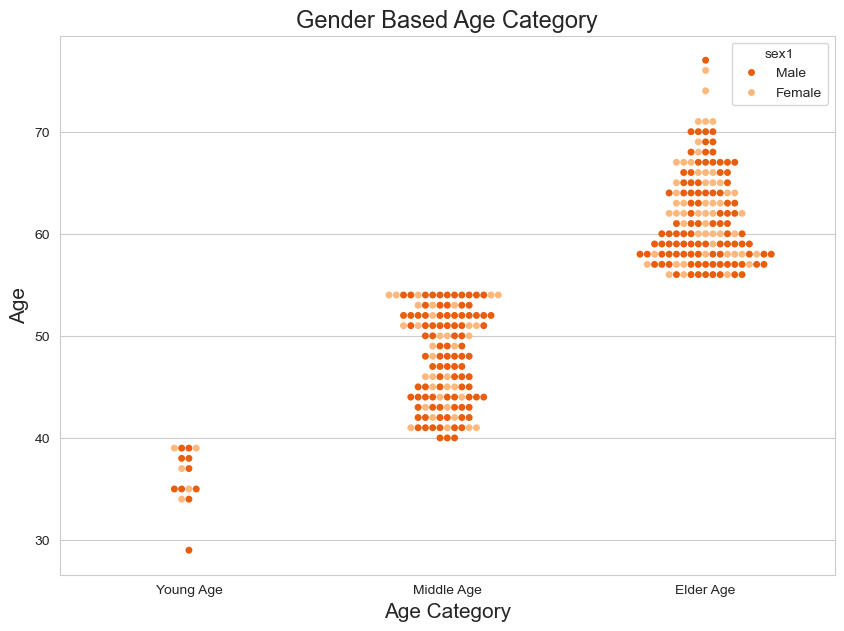

In [28]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

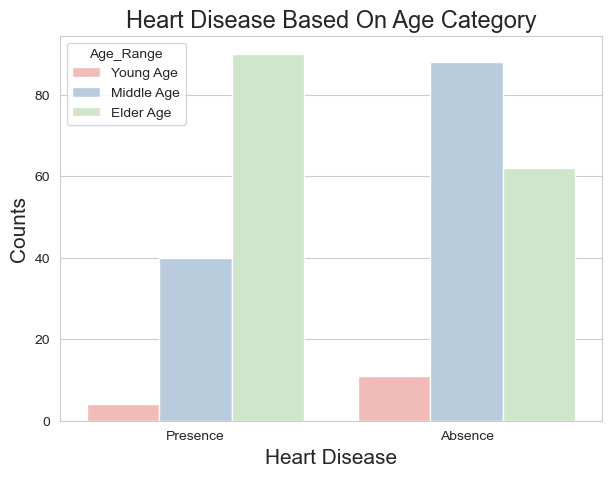

In [29]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

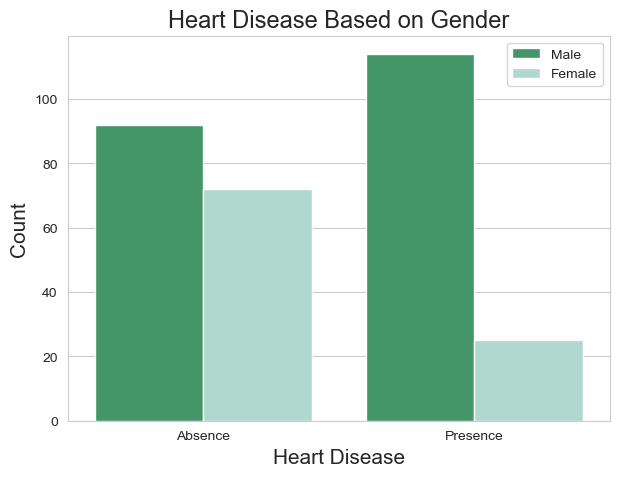

In [33]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex1', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

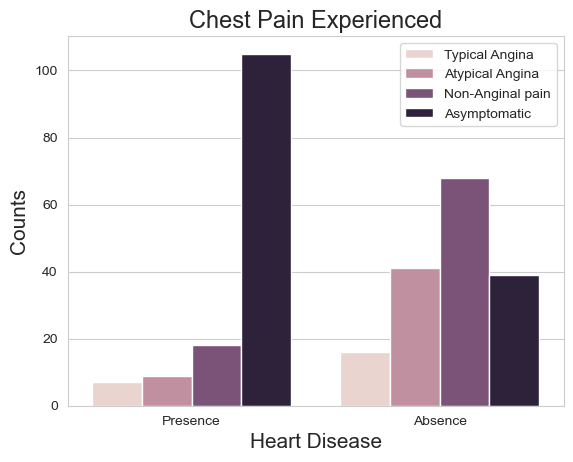

In [34]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

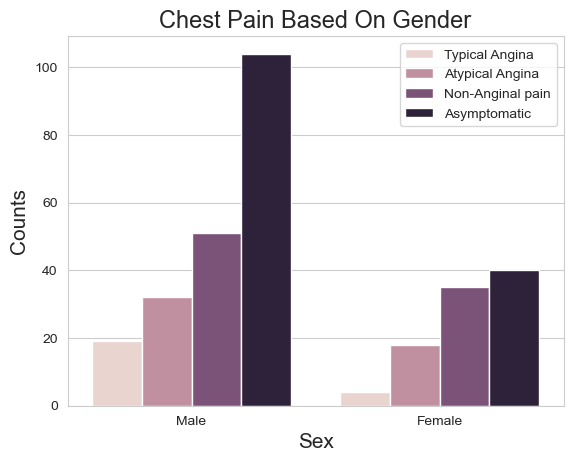

In [35]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

sns.countplot(x=data['sex1'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

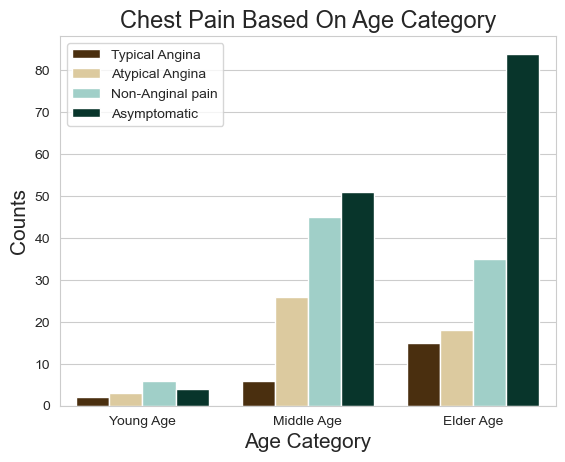

In [40]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11112\3738778419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')


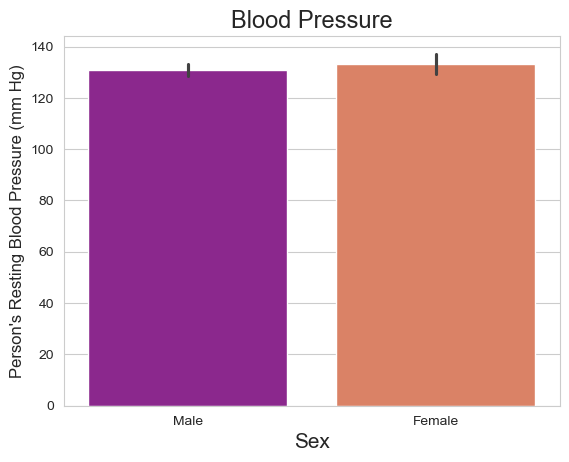

In [42]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11112\2623607158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='chol', data=data, palette='turbo')


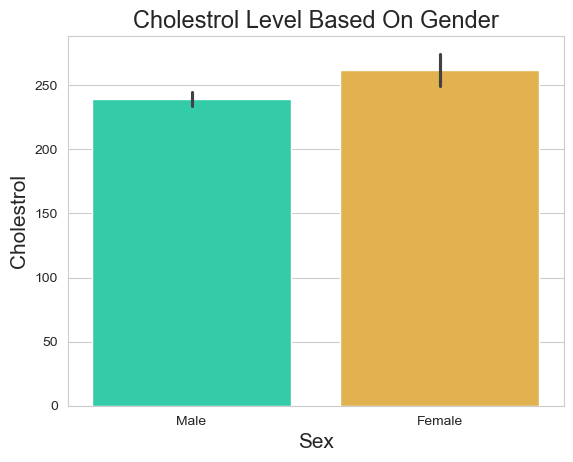

In [43]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='chol', data=data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11112\2825866973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')


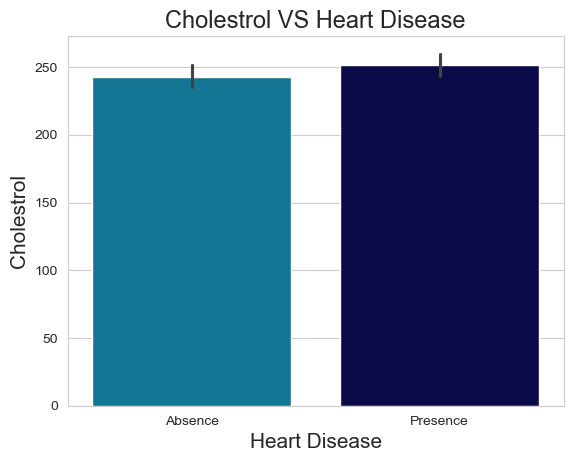

In [44]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11112\2124966136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')


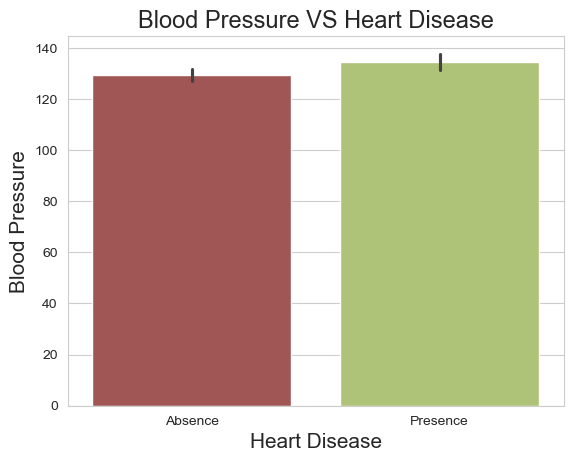

In [45]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

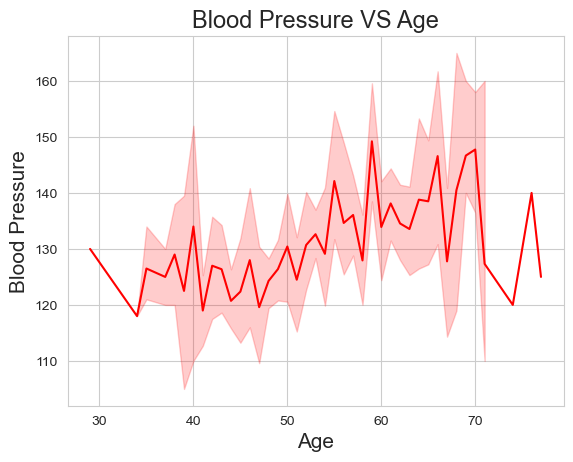

In [46]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

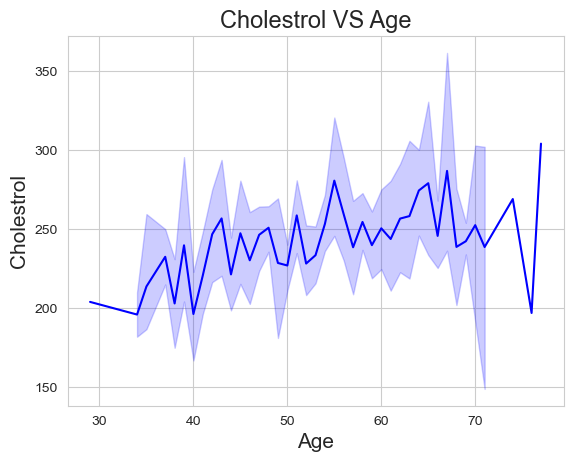

In [47]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

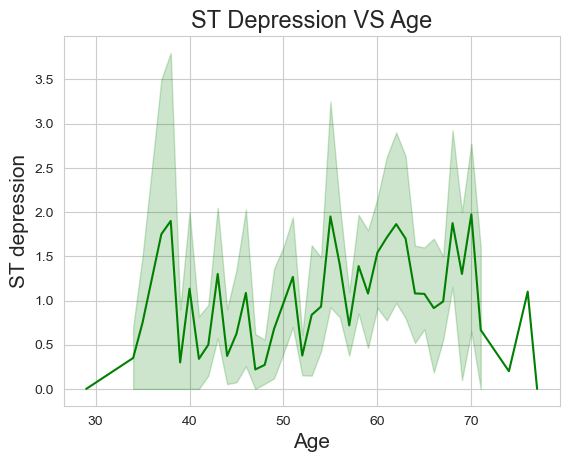

In [48]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11112\201252497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')


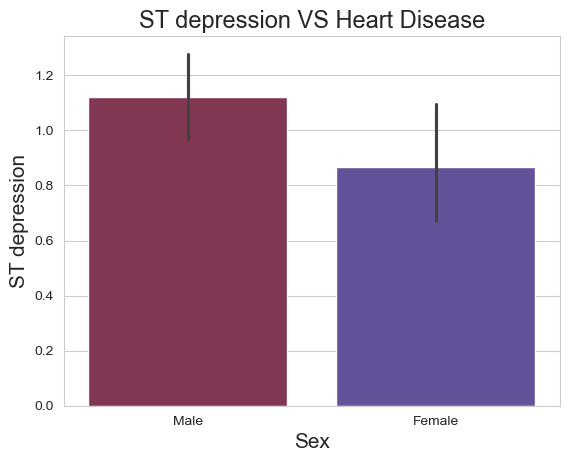

In [50]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11112\2959183411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')


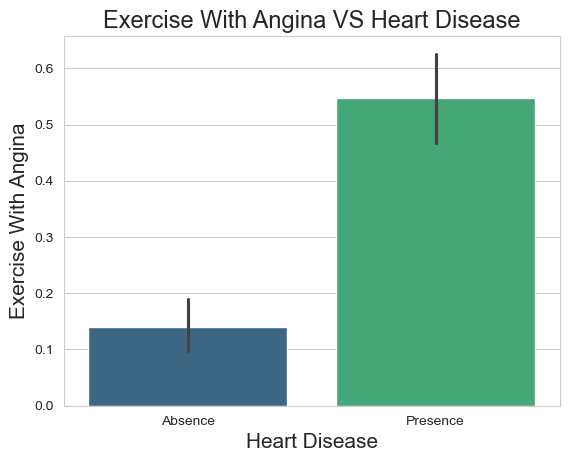

In [51]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

-> If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

C:\Users\user\AppData\Local\Temp\ipykernel_11112\389153480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')


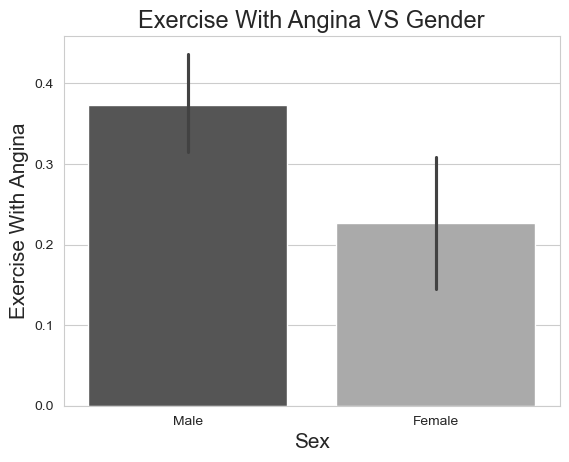

In [54]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

-> Males have have high Exercise Angina
-> A type of chest pain caused by reduced blood flow to the heart.

C:\Users\user\AppData\Local\Temp\ipykernel_11112\3171021298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')


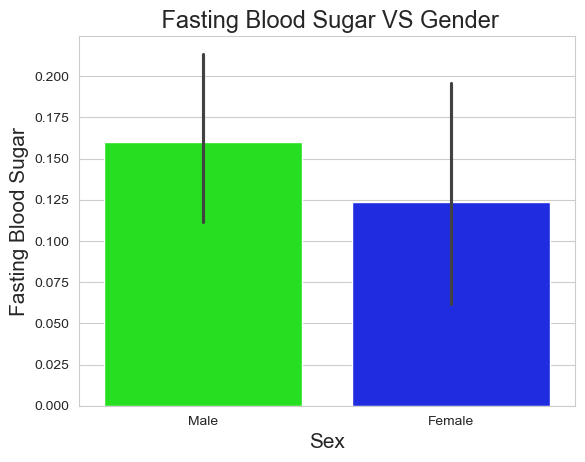

In [56]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

-> Males have high no of Fasting Blood Sugar over 120

In [84]:
data.drop('sex', axis=1, inplace=True)

In [90]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Verify the column names and data
print(data.columns)
print(data.head())

# Drop the 'sex' column if it exists (no need to include 'sex' in features)
data = data.drop(columns=['sex'], errors='ignore')

# Split the data into features and target
X = data.drop(columns=['Heart_Disease'])  # Assuming 'Heart_Disease' is your target variable
y = data['Heart_Disease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features using StandardScaler
# List of columns that are numerical (exclude the target and categorical columns)
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer to standardize the numerical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns)
    ])

# Build a pipeline with the column transformer and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),  # Apply the transformations
    ('classifier', RandomForestClassifier())  # You can choose another classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num', 'Heart_Disease', 'sex1',
       'Age_Range'],
      dtype='object')
   age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0   63   1       145   233    1        2      150      0      2.3      3   0   
1   67   4       160   286    0        2      108      1      1.5      2   3   
2   67   4       120   229    0        2      129      1      2.6      2   2   
3   37   3       130   250    0        0      187      0      3.5      3   0   
4   41   2       130   204    0        2      172      0      1.4      1   0   

   thal  num  Heart_Disease    sex1   Age_Range  
0     6    0              0    Male   Elder Age  
1     3    1              1    Male   Elder Age  
2     7    1              1    Male   Elder Age  
3     3    0              0    Male   Young Age  
4     3    0              0  Female  Middle Age  
Accuracy: 100.00%


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Drop the 'sex' column if it exists
data = data.drop(columns=['sex'], errors='ignore')

# Convert categorical columns (if any) to numeric using LabelEncoder
categorical_cols = data.select_dtypes(include=['object']).columns  # Identify categorical columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features and target
X = data.drop(columns=['Heart_Disease'])  # Assuming 'Heart_Disease' is your target variable
y = data['Heart_Disease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Train an SVM model (with a linear kernel for simplicity)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 100.00%


In [110]:
# Select a sample from the test set for prediction
sample_index = 4  # For example, selecting the 5th sample (change the index to choose other samples)

# Get the sample data
sample_data = X_test.iloc[sample_index].values.reshape(1, -1)  # Reshape for prediction

# Standardize the sample data using the already fitted scaler
sample_data_scaled = scaler.transform(sample_data)  # Transform the sample data

# Make a prediction for the selected sample
sample_prediction = svm_model.predict(sample_data_scaled)

# Output the prediction
print(f"Prediction for sample {sample_index}: {'Heart Disease' if sample_prediction[0] == 1 else 'No Heart Disease'}")


Prediction for sample 4: Heart Disease


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [108]:
print(data.head())

   age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0   63   1       145   233    1        2      150      0      2.3      3   0   
1   67   4       160   286    0        2      108      1      1.5      2   3   
2   67   4       120   229    0        2      129      1      2.6      2   2   
3   37   3       130   250    0        0      187      0      3.5      3   0   
4   41   2       130   204    0        2      172      0      1.4      1   0   

   thal  num  Heart_Disease  sex1  Age_Range  
0     6    0              0     1          0  
1     3    1              1     1          0  
2     7    1              1     1          0  
3     3    0              0     1          2  
4     3    0              0     0          1  


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'data'
# X contains the features, y contains the target
X = data.drop(columns=['Heart_Disease'])  # Adjust column name as per your dataset
y = data['Heart_Disease']  # The target variable (adjust as needed)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features (if needed)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit on training data and transform
x_test_scaled = scaler.transform(x_test)  # Transform the test data

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


In [124]:

model.score(x_train,y_train)

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.45454545454545453

In [126]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
y_predict = model.predict(x_test)

In [130]:
y_predict


array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [136]:
accuracy=model.score(x_test,y_test)
accuracy

0.8524590163934426

In [138]:
print(accuracy_score(y_test, y_predict))

0.8524590163934426


In [142]:

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'data'
# X contains the features, y contains the target
X = data.drop(columns=['Heart_Disease'])  # Adjust column name as per your dataset
y = data['Heart_Disease']  # The target variable (adjust as needed)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit on training data and transform
x_test_scaled = scaler.transform(x_test)  # Transform the test data

# SVM Model
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)

# Predictions

y_pred_svm = svm_model.predict(x_test_scaled)


# Accuracy for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')


SVM Accuracy: 98.36%


In [144]:
y_pred_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)


# Predictions for Random Forest and KNN
y_pred_rf = rf_model.predict(x_test_scaled)
y_pred_knn = knn_model.predict(x_test_scaled)

# Accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')



NameError: name 'knn_model' is not defined

In [ ]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

# KMeans (Clustering) - note: Clustering doesn't use y (target labels)
kmeans_model = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters
kmeans_model.fit(x_train_scaled)

# Accuracy for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')

# Note: KMeans is for clustering, so there is no y_test to compare directly.
# However, you can use the cluster assignments to evaluate, but typically clustering
# doesn't use true labels like classification models.

# Print cluster centers (useful for understanding the clustering result)
print("Cluster centers (KMeans):")
print(kmeans_model.cluster_centers_)

# If you want to see how well the KMeans clusters match the true labels,
# you can use the `accuracy_score` after mapping predicted clusters to actual labels.

# For simplicity, we won't use accuracy for KMeans as it's an unsupervised method.


In [150]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Assuming your data is in a DataFrame called 'data'
# X contains the features, y contains the target
X = data.drop(columns=['Heart_Disease'])  # Adjust column name as per your dataset
y = data['Heart_Disease']  # The target variable (adjust as needed)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit on training data and transform
x_test_scaled = scaler.transform(x_test)  # Transform the test data

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)

# KNN Model (ensure it's defined before usage)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

# KMeans (Clustering) - note: Clustering doesn't use y (target labels)
kmeans_model = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters
kmeans_model.fit(x_train_scaled)

# Predictions for Random Forest and KNN
y_pred_rf = rf_model.predict(x_test_scaled)
y_pred_knn = knn_model.predict(x_test_scaled)

# Accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')

# Accuracy for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')



Random Forest Accuracy: 100.00%
KNN Accuracy: 96.72%


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [154]:

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  # Base estimator for Bagging

# 1. Bagging (using DecisionTreeClassifier as the base estimator)
bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(x_train_scaled, y_train)

# 2. Boosting (GradientBoostingClassifier)
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(x_train_scaled, y_train)

# Predictions for Bagging and Boosting
y_pred_bagging = bagging_model.predict(x_test_scaled)
y_pred_boosting = boosting_model.predict(x_test_scaled)

# Accuracy for Bagging
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f'Bagging Accuracy: {bagging_accuracy * 100:.2f}%')

# Accuracy for Boosting
boosting_accuracy = accuracy_score(y_test, y_pred_boosting)
print(f'Boosting Accuracy: {boosting_accuracy * 100:.2f}%')

Bagging Accuracy: 100.00%
Boosting Accuracy: 100.00%


In [174]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Example text data (replace with your dataset)
texts = [
    "The patient has a high risk of heart disease.",
    "The heart rate is within the normal range.",
    "Patient shows symptoms of arrhythmia.",
    "The patient is recovering well after surgery.",
    # Add more text samples here
]
labels = [1, 0, 1, 0]  # Example binary labels (1 = disease, 0 = no disease)

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenizer for BERT, DistilBERT, or RoBERTa (replace as needed)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # For BERT
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')  # For DistilBERT
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')  # For RoBERTa

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

# Convert to torch tensors
train_inputs = torch.tensor(train_encodings['input_ids'])
train_labels = torch.tensor(train_labels)

test_inputs = torch.tensor(test_encodings['input_ids'])
test_labels = torch.tensor(test_labels)

# Load pre-trained BERT model (use appropriate model for DistilBERT or RoBERTa)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # For BERT
# model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_label


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
